# HAM10000

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import random

import torch
import torch.nn as nn

# created library
import mydata
from mymodels import TransDataset, LoadDataset, EfficientB3Model, ResNet50Model, VGG16Model
from training import ModelTrainer

In [2]:
# to reproduce
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [3]:
db = "HAM"
root = f"../../dataset/AAAI 2025/{db}/"
df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

ycol="labels"
batch_size = 8
ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (450, 600)


# Efficientnet

In [4]:
model_name = "efficientnet"
model_save_directory = f"{root}/model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}.csv"

Validation Accuracy: 0.7488 | Loss: 0.6375 | F1: 0.7883
Validation Accuracy: 0.8134 | Loss: 0.5711 | F1: 0.8350
Validation Accuracy: 0.8134 | Loss: 0.4905 | F1: 0.8390
Validation Accuracy: 0.8272 | Loss: 0.4251 | F1: 0.8466
Validation Accuracy: 0.8272 | Loss: 0.3952 | F1: 0.8366
Validation Accuracy: 0.8318 | Loss: 0.3820 | F1: 0.8457
Validation Accuracy: 0.8318 | Loss: 0.3618 | F1: 0.8410
Validation Accuracy: 0.8272 | Loss: 0.3486 | F1: 0.8330
Validation Accuracy: 0.8456 | Loss: 0.3507 | F1: 0.8540
Validation Accuracy: 0.8318 | Loss: 0.3422 | F1: 0.8352
Validation Accuracy: 0.8387 | Loss: 0.3359 | F1: 0.8325
Validation Accuracy: 0.8387 | Loss: 0.3263 | F1: 0.8372
Validation Accuracy: 0.8272 | Loss: 0.3336 | F1: 0.8210
Validation Accuracy: 0.8364 | Loss: 0.3294 | F1: 0.8297
Validation Accuracy: 0.8318 | Loss: 0.3399 | F1: 0.8161
Validation Accuracy: 0.8502 | Loss: 0.3125 | F1: 0.8519
Validation Accuracy: 0.8502 | Loss: 0.3037 | F1: 0.8546
Validation Accuracy: 0.8571 | Loss: 0.3017 | F1:

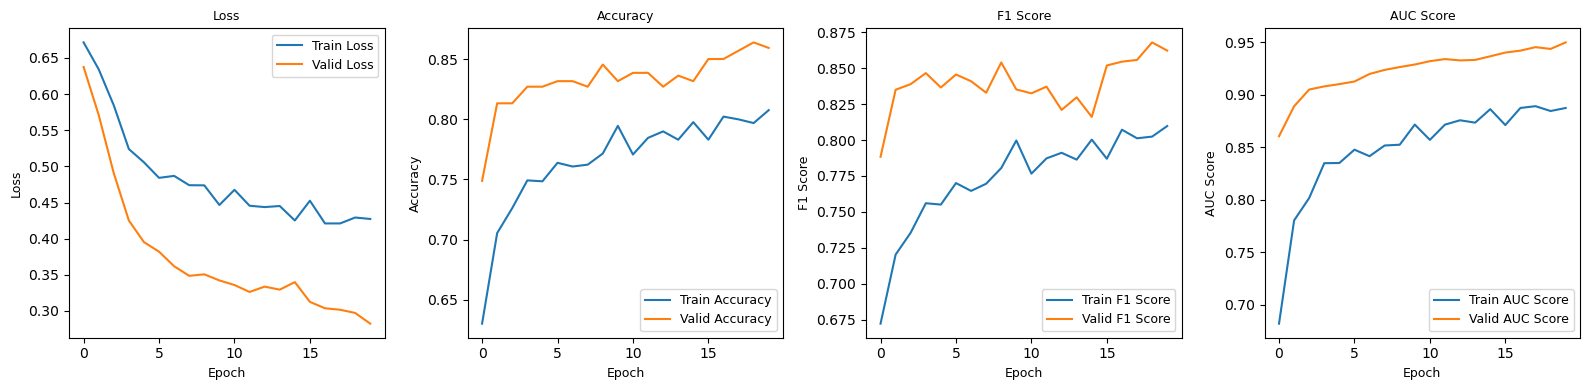

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientB3Model().to(device) # model -> GPU

# Train the model
num_epochs = 20
lr = 0.00001

trainer = ModelTrainer(model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [6]:
model = EfficientB3Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
trainer.report(tmp)
tmp.to_csv(df_valid_filepath, index=False)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       217
           1       0.85      0.88      0.86       217

    accuracy                           0.86       434
   macro avg       0.86      0.86      0.86       434
weighted avg       0.86      0.86      0.86       434

Skin tone 1: Accuracy 0.8594470046082949


In [7]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
trainer.report(tmp)
tmp.to_csv(df_test_filepath, index=False)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       217
           1       0.85      0.82      0.84       217

    accuracy                           0.84       434
   macro avg       0.84      0.84      0.84       434
weighted avg       0.84      0.84      0.84       434

Skin tone 1: Accuracy 0.8387096774193549


# Resnet

In [8]:
model_name = "resnet"
model_save_directory = f"{root}/model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}.csv"

/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Validation Accuracy: 0.7373 | Loss: 0.6341 | F1: 0.7824
Validation Accuracy: 0.7811 | Loss: 0.5019 | F1: 0.8170
Validation Accuracy: 0.8018 | Loss: 0.4079 | F1: 0.8300
Validation Accuracy: 0.8041 | Loss: 0.3930 | F1: 0.8317
Validation Accuracy: 0.8272 | Loss: 0.3752 | F1: 0.8441
Validation Accuracy: 0.8180 | Loss: 0.3728 | F1: 0.8398
Validation Accuracy: 0.8364 | Loss: 0.3441 | F1: 0.8505
Validation Accuracy: 0.8226 | Loss: 0.3584 | F1: 0.8270
Validation Accuracy: 0.8295 | Loss: 0.3533 | F1: 0.8348
Validation Accuracy: 0.8341 | Loss: 0.3540 | F1: 0.8341
Validation Accuracy: 0.8341 | Loss: 0.3427 | F1: 0.8421
Validation Accuracy: 0.8364 | Loss: 0.3390 | F1: 0.8426
Validation Accuracy: 0.8387 | Loss: 0.3381 | F1: 0.8504
Validation Accuracy: 0.8410 | Loss: 0.3336 | F1: 0.8463
Validation Accuracy: 0.8525 | Loss: 0.3215 | F1: 0.8559
Validation Accuracy: 0.8502 | Loss: 0.3361 | F1: 0.8463
Validation Accuracy: 0.8594 | Loss: 0.3326 | F1: 0.8537
Validation Accuracy: 0.8641 | Loss: 0.3086 | F1:

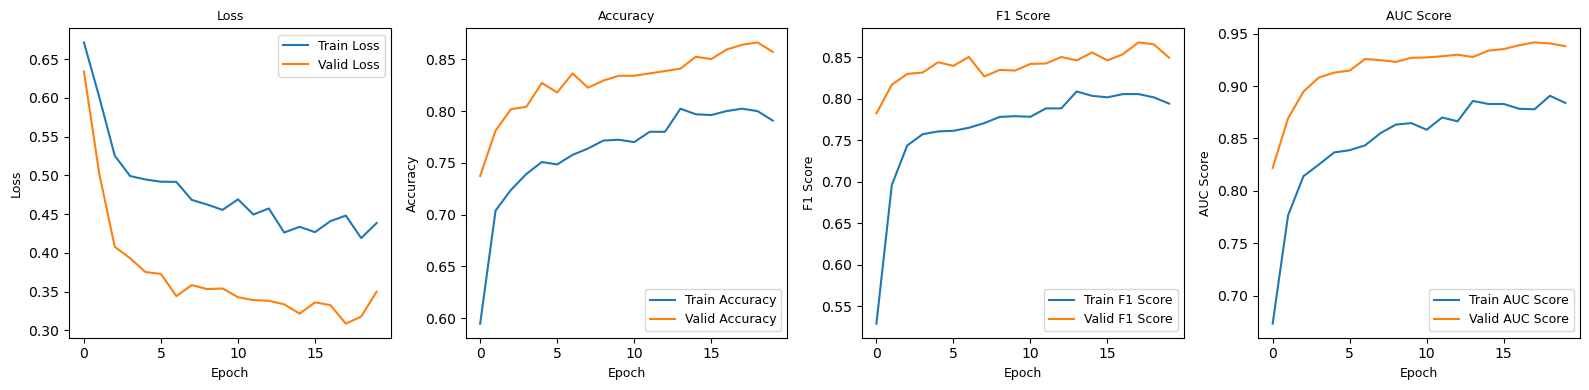

In [9]:
model = ResNet50Model().to(device) # model -> GPU

# Train the model
num_epochs = 20
lr = 0.00001

trainer = ModelTrainer(model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [10]:
model = ResNet50Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
trainer.report(tmp)
tmp.to_csv(df_valid_filepath, index=False)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       217
           1       0.84      0.89      0.87       217

    accuracy                           0.86       434
   macro avg       0.87      0.86      0.86       434
weighted avg       0.87      0.86      0.86       434

Skin tone 1: Accuracy 0.8640552995391705


In [11]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
trainer.report(tmp)
tmp.to_csv(df_test_filepath, index=False)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       217
           1       0.83      0.84      0.83       217

    accuracy                           0.83       434
   macro avg       0.83      0.83      0.83       434
weighted avg       0.83      0.83      0.83       434

Skin tone 1: Accuracy 0.8341013824884793


# VGG

In [12]:
model_name = "vgg"
model_save_directory = f"{root}/model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}.csv"

Validation Accuracy: 0.7857 | Loss: 0.4698 | F1: 0.8166
Validation Accuracy: 0.7949 | Loss: 0.4141 | F1: 0.8251
Validation Accuracy: 0.7995 | Loss: 0.3952 | F1: 0.8297
Validation Accuracy: 0.8341 | Loss: 0.3422 | F1: 0.8442
Validation Accuracy: 0.8433 | Loss: 0.3339 | F1: 0.8515
Validation Accuracy: 0.8456 | Loss: 0.3454 | F1: 0.8559
Validation Accuracy: 0.8318 | Loss: 0.3822 | F1: 0.8495
Validation Accuracy: 0.7880 | Loss: 0.4304 | F1: 0.8182
Validation Accuracy: 0.8157 | Loss: 0.3721 | F1: 0.8020
Validation Accuracy: 0.7972 | Loss: 0.4382 | F1: 0.8261
Validation Accuracy: 0.8295 | Loss: 0.3946 | F1: 0.8439
Validation Accuracy: 0.8203 | Loss: 0.4217 | F1: 0.8440
Validation Accuracy: 0.8041 | Loss: 0.4289 | F1: 0.8297
Validation Accuracy: 0.8249 | Loss: 0.4245 | F1: 0.8436
Validation Accuracy: 0.8641 | Loss: 0.3294 | F1: 0.8656
Validation Accuracy: 0.8295 | Loss: 0.4625 | F1: 0.8419
Validation Accuracy: 0.8364 | Loss: 0.3738 | F1: 0.8337
Validation Accuracy: 0.8272 | Loss: 0.4252 | F1:

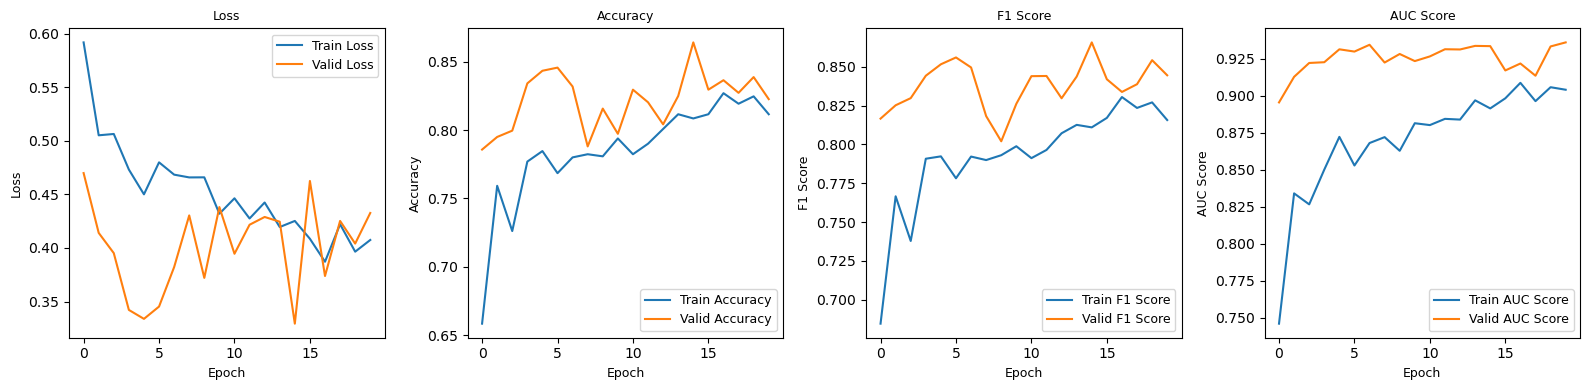

In [13]:
model = VGG16Model().to(device) # model -> GPU

# Train the model
num_epochs = 20
lr = 0.00001

trainer = ModelTrainer(model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [14]:
model = VGG16Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
trainer.report(tmp)
tmp.to_csv(df_valid_filepath, index=False)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       217
           1       0.86      0.88      0.87       217

    accuracy                           0.86       434
   macro avg       0.86      0.86      0.86       434
weighted avg       0.86      0.86      0.86       434

Skin tone 1: Accuracy 0.8640552995391705


In [15]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
trainer.report(tmp)
tmp.to_csv(df_test_filepath, index=False)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       217
           1       0.86      0.82      0.83       217

    accuracy                           0.84       434
   macro avg       0.84      0.84      0.84       434
weighted avg       0.84      0.84      0.84       434

Skin tone 1: Accuracy 0.8387096774193549
